# Fraud Detection Model

## Loading Datasets

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df['isFraud']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [7]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [8]:
y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## Resampling ISFraud Columns to avoid Model Baiseing

In [9]:
from sklearn.utils import resample
majority = df[df['isFraud']==0]
minority = df[df['isFraud']==1]
minority_upsampled = resample(minority,
                             replace=True,     
                             n_samples=len(majority),
                             random_state=42)


df_balanced = pd.concat([majority, minority_upsampled])

In [10]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [11]:
# Check the class distribution
print(df_balanced['isFraud'].value_counts())

isFraud
0    6354407
1    6354407
Name: count, dtype: int64


In [49]:
X = df_balanced.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud','step'], axis=1)
y = df_balanced['isFraud']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [34]:
X_train.shape

(10167051, 6)

In [35]:
X_test.shape

(2541763, 6)

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0
5,PAYMENT,7817.71,53860.0,46042.29,0.0,0.0
6,PAYMENT,7107.77,183195.0,176087.23,0.0,0.0


In [25]:
print(X.columns)

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [60]:
categray = ['type']
encode = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceDest']

In [ ]:
Balancing=ColumnTransformer(
    [
        ('OneHotEncoder',OneHotEncoder(drop='first'),categray),
        ('standardscaling',StandardScaler(),encode)
    ],
    remainder='drop'
)

In [62]:
Balancing

,transformers,"[('OneHotEncoder', ...), ('standardscaling', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [ ]:
pipeline = Pipeline(
    [
        ("pre", Balancing),
        ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
    ]
)

In [85]:
pipeline

,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('OneHotEncoder', ...), ('standardscaling', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
print("Columns in X_train:", list(X_train.columns))
print("Categorical columns:", categray)
print("Numerical columns:", encode)

Columns in X_train: ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
Categorical columns: ['type']
Numerical columns: ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceDest']


In [66]:
missing_cols = [col for col in encode + categray if col not in X_train.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    print("All columns exist!")

All columns exist!


In [ ]:
pipeline.fit(X_train,y_train)

In [68]:
y_predict=pipeline.predict(X_test)

In [69]:
y_predict

array([0, 1, 1, ..., 0, 0, 0], shape=(2541763,))

In [72]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(f'Acuraccy of Model: \n {accuracy_score(y_test,y_predict)}')
print(f'Classification report  of Model: \n {classification_report(y_test,y_predict)}')
print(f'Confussion matrix: \n {confusion_matrix(y_test,y_predict)}')




Acuraccy of Model: 
 0.9430702233056347
Classification report  of Model: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94   1270850
           1       0.95      0.94      0.94   1270913

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763

Confussion matrix: 
 [[1202788   68062]
 [  76640 1194273]]


In [73]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Extract values from confusion matrix
tn, fp, fn, tp = 1202788, 68062, 76640, 1194273

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)  # Also called Sensitivity
specificity = tn / (tn + fp)
f1 = 2 * (precision * recall) / (precision + recall)

print("Performance Metrics:")
print(f"Accuracy:    {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision:   {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:      {recall:.4f} ({recall*100:.2f}%)")
print(f"Specificity: {specificity:.4f} ({specificity*100:.2f}%)")
print(f"F1-Score:    {f1:.4f}")

# For fraud detection, these are important:
print(f"\nFraud Detection Specific:")
print(f"False Positive Rate: {fp/(fp+tn):.4f} ({fp/(fp+tn)*100:.2f}%)")
print(f"False Negative Rate: {fn/(fn+tp):.4f} ({fn/(fn+tp)*100:.2f}%)")

Performance Metrics:
Accuracy:    0.9431 (94.31%)
Precision:   0.9461 (94.61%)
Recall:      0.9397 (93.97%)
Specificity: 0.9464 (94.64%)
F1-Score:    0.9429

Fraud Detection Specific:
False Positive Rate: 0.0536 (5.36%)
False Negative Rate: 0.0603 (6.03%)


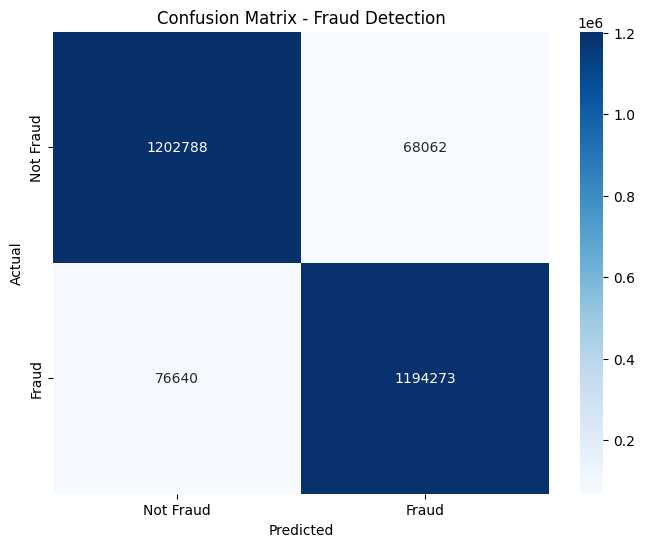

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix plot
cm = np.array([[1202788, 68062], 
               [76640, 1194273]])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Fraud Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
import pickle
pickle.dump(pipeline, open('Model.pkl', 'wb'))